In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
w = np.array([1,0,0])

C1 = [[-0.5,1],[1.5,-1],[0.5,-1]]
C2 = [[-1.5,-2],[-1.5,1],[0.5,-2]]
learning_rate = 0.5

C1_ = C1[:]
C2_ = C2[:]

for point in (C1):
    i = C1.index(point)
    C1_.append(C1[i])
    C1[i] = [1]+ point 
for point in (C2):
    j = C2.index(point)
    C2_.append(C2[j])
    C2[j] = [1]+ point 
    temp = C2[j]
    C2[j] = [x * -1 for x in temp]

adjusted_patterns = C1 + C2

def weight_adjust(w_n,x_n,learning_rate):
    y = np.dot(w_n,x_n)
    
    if y<=0:
#         print "x_n ", type(x_n)
#         print "learn r ", type(learning_rate)
#         print " ",(learning_rate*x_n)  
        return w_n + (learning_rate*np.array(x_n))
    else:
        return w_n

_count = 0
w_old = w
n = 0
while(True):
    print "Epochs ", n
    n += 1
    if _count > 2:
        break
    for pattern in adjusted_patterns:
        w_new = weight_adjust(w,pattern,learning_rate)
        w = w_new
   
    if w.all() == w_old.all():
        _count+=1
    else:
        w_old = w
        
print "Final weight=",w 
print "Bias = ",w[0]

Epochs  0
Epochs  1
Epochs  2
Epochs  3
Epochs  4
Final weight= [ 0.5   1.25  1.  ]
Bias =  0.5


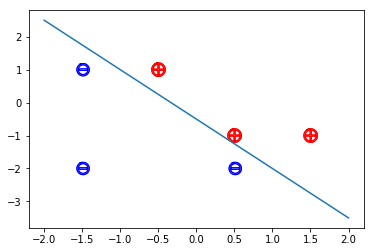

In [3]:
for point1 in (C1_): 
    plt.scatter(point1[0],point1[1], color= 'red',
                s=200, facecolors='none',
                marker='$\\bigoplus$')
for point2 in (C2_): 
    plt.scatter(point2[0],point2[1], color= 'blue',
                s=200, facecolors='none',
                marker='$\\ominus$')    

x1 = np.linspace(-2.0, 2.0, num=10)
x2 =  (-w[0]+(-w[1]*x1))/(w[2])
plt.plot(x1,x2)